## Сформировать программными средствами равномерно распределенное число Ei из интервала [0, 1].

In [81]:
import math
import random
import numpy as np

a = 1
b = 5

n = int(input('Введите n: '))

Ei = []

for i in range(n):
    Ei.append(random.uniform(0, 1))
    
print('Ei: ' + str(Ei)) 

Введите n: 1000
Ei: [0.6876162980809603, 0.5712259413087841, 0.41007654816223293, 0.7854330829151032, 0.24933004955021232, 0.005269409936302538, 0.7990732888777403, 0.19272940602948896, 0.6933086602587871, 0.7680529446136553, 0.48439255109523593, 0.036676856573218286, 0.47980224722198817, 0.921745898052698, 0.25781841578844755, 0.6534338641035803, 0.7234949283795119, 0.4356397867476518, 0.8842684051279289, 0.11432663535456922, 0.8390374589708394, 0.09787491065889498, 0.7866583581152009, 0.007543991231614977, 0.6726650969694203, 0.00010817868030321698, 0.9569031072798052, 0.33776935606504477, 0.9590224892034213, 0.8919036765630558, 0.8924375286146413, 0.23248608713435026, 0.2294289420881236, 0.3413275434310341, 0.2644106283441283, 0.9260494016876353, 0.06701702572101065, 0.5523837091527746, 0.6611486920159906, 0.8005338924002687, 0.5065225744737207, 0.6964498557317073, 0.4247025351063304, 0.9236357223614636, 0.5889351772214263, 0.0002581366018831188, 0.9858609699451075, 0.06024593505130

## Преобразовать Ei в число Xi равномерно распределенное на интервале [1, 5] и получить случайное число Yi

In [82]:
Xi = [0] * n
Yi = [0] * n

for i in range(0, n):
    Xi[i] = Ei[i] * (b - a) + a
    Yi[i] = math.sqrt(Xi[i])

print('Выборка: ' + str(Yi))

Выборка: [1.9366117815204578, 1.8124303476920531, 1.6249019024694789, 2.035124647696158, 1.4132657917747988, 1.0104838641686518, 2.0484855761051777, 1.3307582891411782, 1.9424815677465639, 2.017972194668356, 1.7139341307007523, 1.070844258654298, 1.7085692812666253, 2.1649442469058626, 1.4252275829332628, 1.900982760683095, 1.973316931848011, 1.656067373928551, 2.1300407555987553, 1.2071895217480464, 2.087139151059018, 1.1796184309494235, 2.036328419597586, 1.014975844503927, 1.9211091556383988, 1.0002163339604153, 2.197182839255582, 1.53332234845129, 2.1991111742732983, 2.1371978631498356, 2.1376973860812396, 1.3892243694009263, 1.384816149657598, 1.5379564927929972, 1.4344485049580948, 2.1689162286152364, 1.1260853000035311, 1.791517467570746, 1.9090821794946289, 2.049911112609782, 1.7395661234615036, 1.9457130885428173, 1.642805569878956, 2.1666893846248136, 1.831868092654519, 1.0005161400035145, 2.2233856794943225, 1.11399449738552, 1.7186823804628155, 2.115065595056616, 1.66188877

## Для полученной СВ построить вариационный ряд

In [83]:
Yi.sort()

var_row = { }

for v in Yi:
    if v in var_row:
        var_row[v] += 1
    else:
        var_row[v] = 1

print('Вариационный ряд: ' + str(var_row.keys()))

Вариационный ряд: dict_keys([1.0002163339604153, 1.0005161400035145, 1.0007079434905228, 1.0069976027708722, 1.0080723521452588, 1.0085019794078134, 1.0086285244272286, 1.0088659414100292, 1.0091962223196886, 1.0104838641686518, 1.0144341847090792, 1.014975844503927, 1.0150363831555995, 1.0178792863550887, 1.019652578034626, 1.0199278104024403, 1.0211982404535795, 1.0235203956245977, 1.0247342962477302, 1.0250241767376633, 1.0253297810544628, 1.0271694734979373, 1.0280306743411114, 1.0351694706843746, 1.0358671847397363, 1.0359542991578643, 1.0385368577035627, 1.0394117506031493, 1.0395030910557959, 1.0407265056810657, 1.041141477997653, 1.048294223869442, 1.051079237666089, 1.0547713447435672, 1.0635520284809408, 1.0662870810031957, 1.067711874591566, 1.0699677927528257, 1.070095947712568, 1.0700985255072297, 1.07017762313854, 1.070844258654298, 1.0721607096456494, 1.072894022984573, 1.0737986290281591, 1.0738388218411403, 1.0748490885127395, 1.0777985704491517, 1.0783053069717434, 1.

## Эмпирическую функцию

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

elements = list(var_row.items())

n2 = len(elements)

emp_func_val = [0] * (n2 + 1)
interval_label = [' '] * (n2 + 1)


for i in range(0, n2 + 1):
    
    if i == 0:
        emp_func_val[i] = 0
        interval_label[i] = 'x <= ' + str(elements[0][0])
        continue
          
    elif i == n2:
        emp_func_val[i] = 1
        interval_label[i] = 'x > ' + str(elements[n2 - 1][0])
        continue
    

    xi, freq = elements[i]
    emp_func_val[i] = emp_func_val[i - 1] + freq / n
    interval_label[i] = str(elements[i - 1][0]) + ' <  x <= ' + str(xi)

    
    
d = {'Относительная частота': emp_func_val, 
     'Интервал': interval_label }

df = pd.DataFrame(data=d)

df  


,Относительная частота,Интервал
0,0.000,x <= 1.0002163339604153
1,0.001,1.0002163339604153 < x <= 1.0005161400035145
2,0.002,1.0005161400035145 < x <= 1.0007079434905228
3,0.003,1.0007079434905228 < x <= 1.0069976027708722
4,0.004,1.0069976027708722 < x <= 1.0080723521452588
5,0.005,1.0080723521452588 < x <= 1.0085019794078134
6,0.006,1.0085019794078134 < x <= 1.0086285244272286
7,0.007,1.0086285244272286 < x <= 1.0088659414100292
8,0.008,1.0088659414100292 < x <= 1.0091962223196886
9,0.009,1.0091962223196886 < x <= 1.0104838641686518


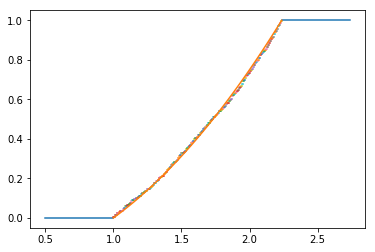

In [85]:
emp_func_graph = []

for i in range(0, n2 + 1):
    if i == 0:
        x = np.linspace(elements[0][0] - 0.5, elements[0][0])
        y = x * 0
        emp_func_graph.append((x, y))
    
    elif i == n2:
        x = np.linspace(elements[n2 - 1][0], elements[n2 - 1][0] + 0.5)
        y = [1 for a in x]
        emp_func_graph.append((x, y))

    else:
        x = np.linspace(elements[i - 1][0], elements[i][0])
        y = [emp_func_val[i] for a in x]
        emp_func_graph.append((x, y))

for x, y in emp_func_graph:
    plt.plot(x, y)

x = np.linspace(a, b ** 0.5)
y = x ** 2 / 4  - 1 / 4

plt.plot(x, y) 

# Лабораторная работа №2
## Статистический ряд. Построение гистограммы равноинтервальным и равновероятным методами.

*__Задание 1.__* Для полученной случайной величины построить гистограмму равноинтервальным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным. Результаты представить в виде таблицы и графика.

M: 39


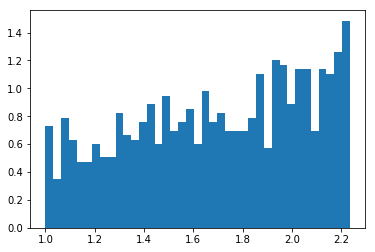

In [93]:
n = len(Yi)

M = int(math.sqrt(n)) if n <= 100 else int(4 * math.log2(n))
print('M: ' + str(M))

nums, borders, _ = plt.hist(Yi, bins = M, density = True) 

(array([0.72668808, 0.34754647, 0.78987835, 0.63190268, 0.47392701,
        0.47392701, 0.60030754, 0.50552214, 0.50552214, 0.82147348,
        0.66349781, 0.63190268, 0.75828321, 0.88466375, 0.60030754,
        0.94785402, 0.69509294, 0.75828321, 0.85306861, 0.60030754,
        0.97944915, 0.75828321, 0.82147348, 0.69509294, 0.69509294,
        0.69509294, 0.78987835, 1.10582968, 0.56871241, 1.20061509,
        1.16901995, 0.88466375, 1.13742482, 1.13742482, 0.69509294,
        1.13742482, 1.10582968, 1.26380535, 1.48497129]),
 array([1.00021633, 1.03186678, 1.06351722, 1.09516766, 1.12681811,
        1.15846855, 1.190119  , 1.22176944, 1.25341988, 1.28507033,
        1.31672077, 1.34837121, 1.38002166, 1.4116721 , 1.44332254,
        1.47497299, 1.50662343, 1.53827387, 1.56992432, 1.60157476,
        1.6332252 , 1.66487565, 1.69652609, 1.72817654, 1.75982698,
        1.79147742, 1.82312787, 1.85477831, 1.88642875, 1.9180792 ,
        1.94972964, 1.98138008, 2.01303053, 2.04468097, 2.

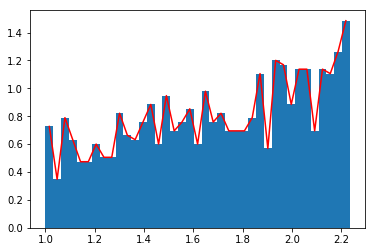

In [101]:
h = borders[1] - borders[0]

plt.plot(borders[:-1] + h / 2, nums, 'r') 
plt.hist(var_row.keys(), bins=M, density=True)

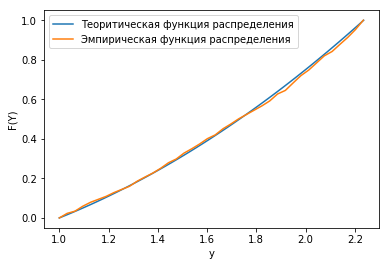

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Y,1.000216,1.031867,1.063517,1.095168,1.126818,1.158469,1.190119,1.221769,1.25342,1.28507,...,1.94973,1.98138,2.013031,2.044681,2.076331,2.107982,2.139632,2.171283,2.202933,2.234584
F(Y),0.000000,0.023000,0.034000,0.059000,0.079000,0.094000,0.109000,0.128000,0.14400,0.16000,...,0.68300,0.72000,0.748000,0.784000,0.820000,0.842000,0.878000,0.913000,0.953000,1.000000


In [102]:
freq = nums * h

emp_func = [ 0 ]
for i in range(1, len(freq)):
    emp_func.append(emp_func[i - 1] + freq[i - 1])

emp_func.append(1)
    
    
plt.plot(x, y, label='Теоритическая функция распределения')    
plt.plot(borders, emp_func, label='Эмпирическая функция распределения')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

table = pd.DataFrame(data={"Y": borders, "F(Y)": emp_func})
table.T

*__Задание 2.__* Найти теоретически плотность распределения СВ Y.  Результаты представить в аналитическом виде и в виде графика.

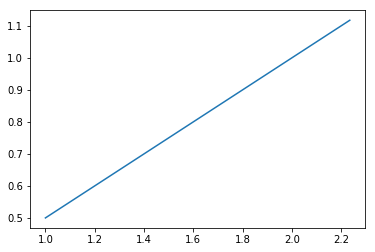

In [103]:
xp = np.linspace(borders[0], borders[-1], 100)
yp = xp / 2 


plt.plot(xp, yp, label='Теоритическая плотность')    

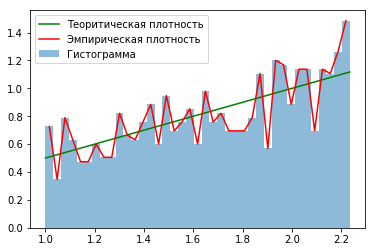

In [107]:
plt.hist(Yi, bins = M, density = True,alpha=0.5, label='Гистограмма') 
plt.plot(xp, yp, label='Теоритическая плотность', color= 'g') 
plt.plot(borders[:-1] + h / 2, nums, 'r', label='Эмпирическая плотность',) 

plt.legend()

*__Задание 4.__* Для полученной случайной величины построить гистограмму равновероятностным методом, полигон распределения и эмпирическую функцию распределения по сгруппированным данным. Результаты представить в виде таблицы и графика.

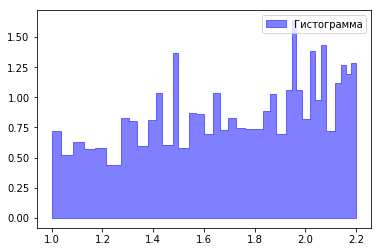

In [108]:
elements = Yi #list(var_row.keys())

A = [elements[0]]
B = []


m = n // M

A = [elements[0]]
B = []
for i in range(1, M):
    A.append(elements[i * m])
    B.append(elements[i * m])
    
B.append(elements[-1])

delta = []

for i in range(len(A)):
    delta.append(B[i] - A[i])
y2 = []
x2 = []

s = A[0]

for i in delta:
    y2.append(1. /(M * i))
    x2.append(s)
    s += i
    
plt.fill_between(x2, y1=y2, y2=[0]*len(y2), color='b', step='post', alpha=0.5, label="Гистограмма")
plt.legend()

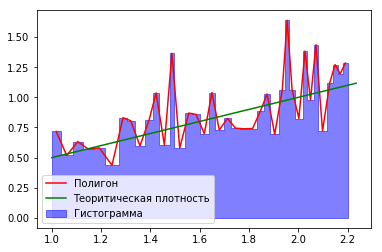

In [106]:
center = []
for i in range(len(x2) - 1):
    center.append((x2[i] + x2[i + 1]) / 2)

plt.fill_between(x2, y1=y2, y2=[0]*len(y2), step='post', alpha=0.5, color='b', label="Гистограмма")
plt.plot(center, y2[:-1], color='r', label='Полигон')
plt.plot(xp, yp, label='Теоритическая плотность', color= 'g') 

plt.legend()